In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from simple_tritium_transport_model import Model, ureg, quantity_to_activity
from baby_run_3 import *
from baby_run_4 import *
from baby_run_5 import *

ureg.mpl_formatter = "{:~P}"

COLLECTION_VOLUME = 10 * ureg.ml
LSC_SAMPLE_VOLUME = 10 * ureg.ml

In [2]:
import baby_run_3
model_run_3 = baby_run_3.baby_model
model_run_3.run(6 * ureg.day)


/home/remidm/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:224: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x0 = asarray(x0).flatten()
/home/remidm/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:239: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  retval = _minpack._hybrd(func, x0, args, 1, xtol, maxfev,
/home/remidm/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [3]:
import baby_run_5
model_run_5 = baby_run_5.baby_model

model_run_5.run(7 * ureg.day)

In [4]:
replacement_times_run_3 = [1, 2, 4] * ureg.day

replacement_times_run_5 = [
    # 12/05 22:58
    0 * ureg.day + 13 * ureg.hour + 28 * ureg.minute,
    # 12/06 09:09
    0 * ureg.day + 23 * ureg.hour + 39 * ureg.minute,
    # 12/06 21:58 
    1 * ureg.day + 12 * ureg.hour + 28 * ureg.minute,
    # 12/07 11:19
    1 * ureg.day + 25 * ureg.hour + 49 * ureg.minute,
    # 12/08 09:53
    2 * ureg.day + 24 * ureg.hour + 23 * ureg.minute,
    # 12/09 08:28
    3 * ureg.day + 22 * ureg.hour + 58 * ureg.minute,
    # 12/11 12:48
    6 * ureg.day + 3 * ureg.hour + 18 * ureg.minute,
]

In [5]:
m = baby_run_5.measurements_after_background_sub
sample_1 = sum(list(m[1].values()))
sample_2 = sum(list(m[2].values()))
sample_3 = sum(list(m[3].values()))
sample_4 = sum(list(m[4].values()))
sample_5 = sum(list(m[5].values()))
sample_6 = sum(list(m[6].values()))
sample_7 = sum(list(m[7].values()))

cumulative_1 = sample_1
cumulative_2 = cumulative_1 + sample_2
cumulative_3 = cumulative_2 + sample_3
cumulative_4 = cumulative_3 + sample_4
cumulative_5 = cumulative_4 + sample_5
cumulative_6 = cumulative_5 + sample_6

cumulative_7 = cumulative_6 + sample_7


cumulative_values_run_5 = [cumulative_1, cumulative_2, cumulative_3, cumulative_4, cumulative_5, cumulative_6, cumulative_7]

In [6]:
cumulative_1 = vial_311 + vial_312 + vial_313 + vial_314
cumulative_2 = cumulative_1 + vial_321 + vial_322 + vial_323 + vial_324
cumulative_3 = cumulative_2 + vial_331 + vial_332 + vial_333 + vial_334

cumulative_values_run_3 = [cumulative_1, cumulative_2, cumulative_3]

In [7]:
import baby_run_4
model_run_4 = baby_run_4.baby_model
model_run_4.run(6 * ureg.day)

In [8]:
m = baby_run_4.measurements_after_background_sub
sample_1 = sum(list(m[2].values()))
sample_2 = sum(list(m[3].values()))
sample_3 = sum(list(m[4].values()))
sample_4 = sum(list(m[5].values()))
sample_5 = sum(list(m[6].values()))
sample_6 = sum(list(m[7].values()))
sample_7 = sum(list(m[8].values()))

# sample_1 += 0.5/2 * sample_5
# sample_2 += 0.5/2 * sample_5
# sample_5 *= 0.5


cumulative_1 = sample_1
cumulative_2 = cumulative_1 + sample_2
cumulative_3 = cumulative_2 + sample_3
cumulative_4 = cumulative_3 + sample_4
cumulative_5 = cumulative_4 + sample_5
cumulative_6 = cumulative_5 + sample_6
cumulative_7 = cumulative_6 + sample_7


cumulative_values_run_4 = [cumulative_1, cumulative_2, cumulative_3, cumulative_4, cumulative_5, cumulative_6, cumulative_7]

In [9]:
replacement_times_run_4 = [
    irr[0] for irr in model_run_4.irradiations[1:]
]  # before each irradiation

replacement_times_run_4 += [
    irr[1] for irr in model_run_4.irradiations
]  # after each irradiation

replacement_times_run_4.append(2 * ureg.day)  # after the last irradiation
replacement_times_run_4.append(3 * ureg.day)
replacement_times_run_4.append(4 * ureg.day)
replacement_times_run_4.append(6 * ureg.day)

replacement_times_run_4 = sorted(replacement_times_run_4)

/home/remidm/.local/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:448: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y = np.asarray(y)
/home/remidm/.local/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:452: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asarray(x)


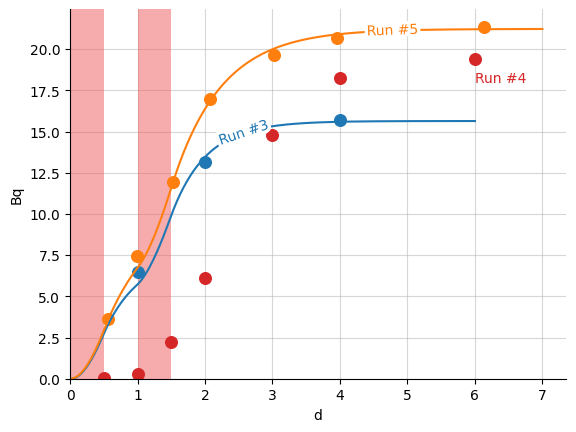

In [10]:
plt.figure()

irradiations = [(0 * ureg.day, 12 * ureg.hour), (24 * ureg.hour, 36 * ureg.hour)]

for irr in irradiations:
    plt.axvspan(
        irr[0].to(ureg.day),
        irr[1].to(ureg.day),
        facecolor="#EF5B5B",
        alpha=0.5,
    )

color_run_3 = "tab:blue"
color_run_4 = "tab:red"
color_run_5 = "tab:orange"

integrated_top_run_3 = quantity_to_activity(model_run_3.integrated_release_top()).to(
            ureg.Bq
        )
plt.plot(model_run_3.times.to(ureg.day), integrated_top_run_3, color=color_run_3, label="Run #3")

plt.scatter(
    replacement_times_run_3,
    cumulative_values_run_3,
    s=70,
    color=color_run_3
)

integrated_top_run_5 = quantity_to_activity(model_run_5.integrated_release_top()).to(
            ureg.Bq
        )
plt.plot(model_run_5.times.to(ureg.day), integrated_top_run_5, color=color_run_5, label="Run #5")

plt.scatter(
    replacement_times_run_5,
    cumulative_values_run_5,
    s=70,
    color=color_run_5
)

plt.scatter(
    replacement_times_run_4,
    cumulative_values_run_4,
    s=70,
    color=color_run_4
)

plt.annotate("Run #4", (6 * ureg.days, 18 * ureg.Bq), color=color_run_4)

plt.xlim(left=0 * ureg.day)
plt.ylim(bottom=0)
plt.gca().spines[["right", "top"]].set_visible(False)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5)
# plt.gcf().text(0.08, 0.97, "Cumulative tritium release", weight="bold", fontsize=15)
# axis below graph
plt.gca().set_axisbelow(True)
plt.savefig("cumulative_release_compare_runs.pdf")

In [11]:
print(model_run_3.k_top)
print(model_run_5.k_top)

print(model_run_3.neutron_rate * model_run_3.TBR)
print(model_run_5.neutron_rate * model_run_5.TBR)

1.47e-06 meter / second
1.0289999999999998e-06 meter / second
146440.8 particle / second
193365.84 particle / second
